# Data Analysis And Visulation On World Happiness Data

## Python libraries

In [69]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
plt.style.use("seaborn-notebook")
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv
/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv


<a id = '2'></a>
## Data Contents
* Country name: Name of the country.
* Regional indicator: Region to which the country belongs.
* Ladder score: The happiness score for each country, based on responses to the Cantril Ladder question that asks respondents to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0.
* Upper whisker: Upper bound of the happiness score.
* Lower whisker: Lower bound of the happiness score.
* Log GDP per capita: The natural logarithm of the country's GDP per capita, adjusted for purchasing power parity (PPP) to account for differences in the cost of living between countries.
* Social support: The national average of binary responses(either 0 or 1 representing No/Yes) to the question about having relatives or friends to count on in times of trouble.
* Healthy life expectancy: The average number of years a newborn infant would live in good health, based on mortality rates and life expectancy at different ages.
* Freedom to make life choices: The national average of responses to the question about satisfaction with freedom to choose what to do with one's life.
* Generosity: The residual of regressing the national average of responses to the question about donating money to charity on GDP per capita.
* Perceptions of corruption: The national average of survey responses to questions about the perceived extent of corruption in the government and businesses.
* Dystopia + residual: Dystopia is an imaginary country with the world’s least-happy people, used as a benchmark for comparison. The dystopia + residual score is a combination of the Dystopia score and the unexplained residual for each country, ensuring that the combined score is always positive. Each of these factors contributes to the overall happiness score, but the Dystopia + residual value is a benchmark that ensures no country has a lower score than the hypothetical Dystopia.
* Positive affect: The national average of responses to questions about positive emotions experienced yesterday.
* Negative affect: The national average of responses to questions about negative emotions experienced yesterday.

<a id = "3"></a>
## Read and Analyse Data
bu kısımda datayı okuyup analiz ediyoruz.

In [70]:
#read and show first five row of data
world_happiness = pd.read_csv("/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv", encoding = "latin1")
df = world_happiness.copy()
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [71]:
#describe basic statistic in data set
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.000000,2363.000000,2335.000000,2350.000000,2300.000000,2327.000000,2282.000000,2238.000000,2339.000000,2347.000000
mean,2014.763860,5.483566,9.399671,0.809369,63.401828,0.750282,0.000098,0.743971,0.651882,0.273151
std,5.059436,1.125522,1.152069,0.121212,6.842644,0.139357,0.161388,0.184865,0.106240,0.087131
min,2005.000000,1.281000,5.527000,0.228000,6.720000,0.228000,-0.340000,0.035000,0.179000,0.083000
25%,2011.000000,4.647000,8.506500,0.744000,59.195000,0.661000,-0.112000,0.687000,0.572000,0.209000
50%,2015.000000,5.449000,9.503000,0.834500,65.100000,0.771000,-0.022000,0.798500,0.663000,0.262000
75%,2019.000000,6.323500,10.392500,0.904000,68.552500,0.862000,0.093750,0.867750,0.737000,0.326000
max,2023.000000,8.019000,11.676000,0.987000,74.600000,0.985000,0.700000,0.983000,0.884000,0.705000


In [72]:
#information about data set
df.info()
#bu kısımda info fonksiyonuyla değerlerin ne oldğunu ve featurlerı görüyoruz.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [73]:
#detecting missing values at each columns
df.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

In [74]:
#deletion of missing values
df = df.dropna()
df.isnull().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [75]:
#read and show first five row of data
world_happiness2024 = pd.read_csv("/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv")
df2024 = world_happiness2024.copy()
df2024.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [76]:
#describe basic statistics about data set
df2024.describe()

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


In [77]:
#detecting missing values at each columns
df2024.isnull().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64

In [78]:
#general information of data
df2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


In [79]:
#deletion of missing values
df2024 = df2024.dropna()
df2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  140 non-null    object 
 1   Regional indicator            140 non-null    object 
 2   Ladder score                  140 non-null    float64
 3   upperwhisker                  140 non-null    float64
 4   lowerwhisker                  140 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 14.2+ KB


<a id = 4></a>
## Data Distributions in 2024
* Unique Countries
* Count Regional Indicator
* Distributions of Other Features

In [80]:
#unique countries
df2024['Country name'].unique()

array(['Finland', 'Denmark', 'Iceland', 'Sweden', 'Israel', 'Netherlands',
       'Norway', 'Luxembourg', 'Switzerland', 'Australia', 'New Zealand',
       'Costa Rica', 'Kuwait', 'Austria', 'Canada', 'Belgium', 'Ireland',
       'Czechia', 'Lithuania', 'United Kingdom', 'Slovenia',
       'United Arab Emirates', 'United States', 'Germany', 'Mexico',
       'Uruguay', 'France', 'Saudi Arabia', 'Kosovo', 'Singapore',
       'Taiwan Province of China', 'Romania', 'El Salvador', 'Estonia',
       'Poland', 'Spain', 'Serbia', 'Chile', 'Panama', 'Malta', 'Italy',
       'Guatemala', 'Nicaragua', 'Brazil', 'Slovakia', 'Latvia',
       'Uzbekistan', 'Argentina', 'Kazakhstan', 'Cyprus', 'Japan',
       'South Korea', 'Philippines', 'Vietnam', 'Portugal', 'Hungary',
       'Paraguay', 'Thailand', 'Malaysia', 'China', 'Honduras', 'Croatia',
       'Greece', 'Bosnia and Herzegovina', 'Libya', 'Jamaica', 'Peru',
       'Dominican Republic', 'Mauritius', 'Moldova', 'Russia', 'Bolivia',
       'Ecua

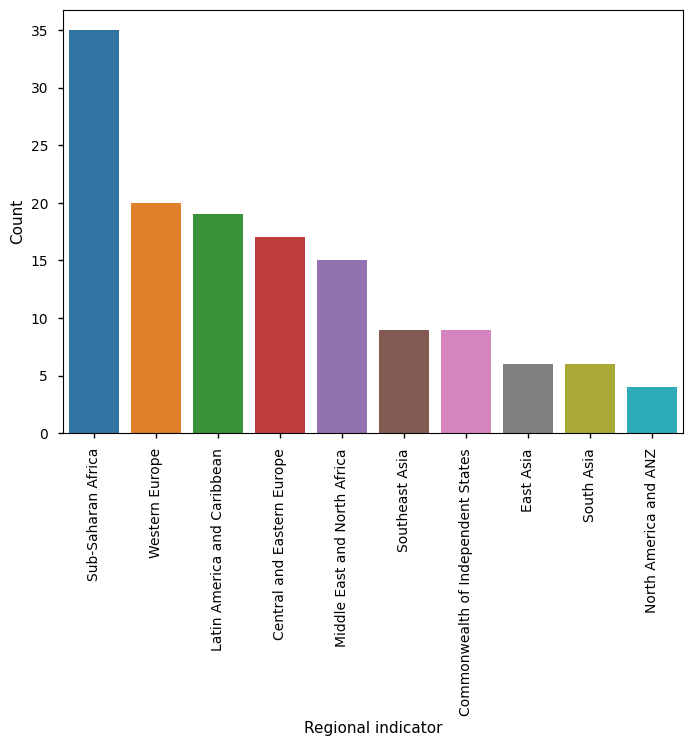

In [81]:
#count regional indicator
regional_counts = df2024["Regional indicator"].value_counts().reset_index()
regional_counts.columns = ["Regional indicator", "Count"]

sns.barplot(data = regional_counts, x = "Regional indicator", y = "Count")
plt.xticks(rotation = 90)
plt.show()

<Axes: >

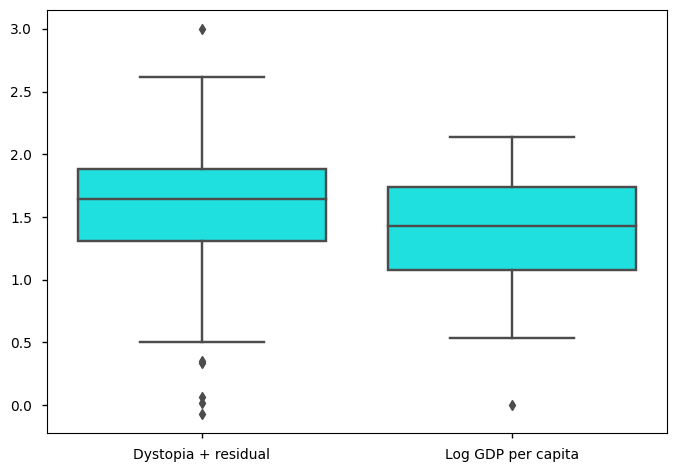

In [82]:
#distribution of feature set 1
list_features = ["Dystopia + residual", "Log GDP per capita"]
sns.boxplot(data = df2024.loc[:, list_features], orient = "v", color = "cyan")

<Axes: >

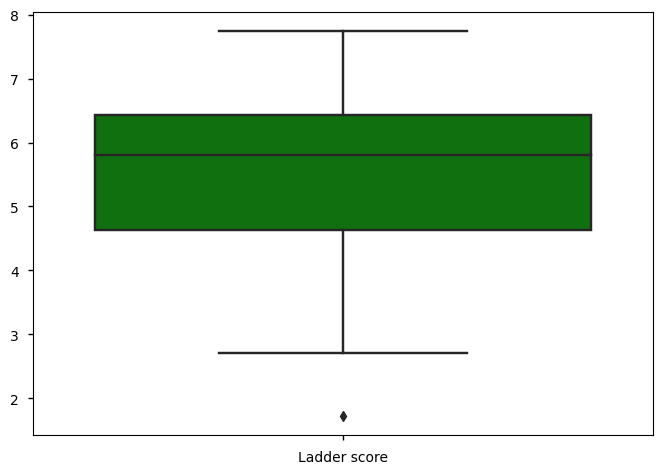

In [83]:
#distribution of feature set 2
list_feature = ["Ladder score"]
sns.boxplot(data = df2024.loc[:, list_feature], orient = "v", color = "green")

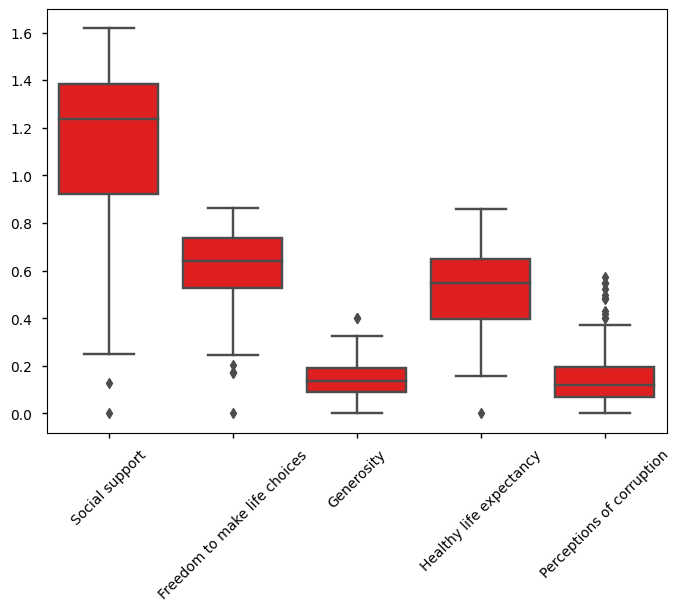

In [84]:
#distribution of feature set 3
list_features = ["Social support", "Freedom to make life choices", "Generosity", 
                 "Healthy life expectancy","Perceptions of corruption"]
sns.boxplot(data = df2024.loc[:, list_features], orient = "v", color = "red")
plt.xticks(rotation = 45)
plt.show()

<a id = 5></a>
## Happiest and Unhappiest Countries in 2024
en mutlu ve en mutusuz ülkeleri listeleyip plot oluşturuyoruz.

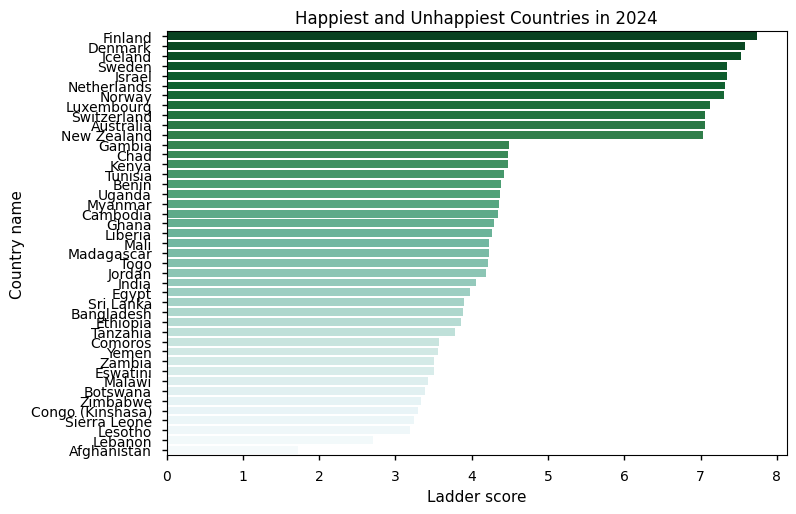

In [85]:
df2024_happiest_unhappiest = df2024[(df2024.loc[:, "Ladder score"] > 7) | (df2024.loc[:, "Ladder score"] < 4.5)]
sns.barplot(data = df2024_happiest_unhappiest, x = "Ladder score", y = "Country name", palette = "BuGn_r")
plt.title("Happiest and Unhappiest Countries in 2024")
plt.show()

<a id = '6'></a>
## Ladder Score Distribution by Regional Indicator
bölgesel indikatörle göre ladder score tablosunu oluşturuyoruz.

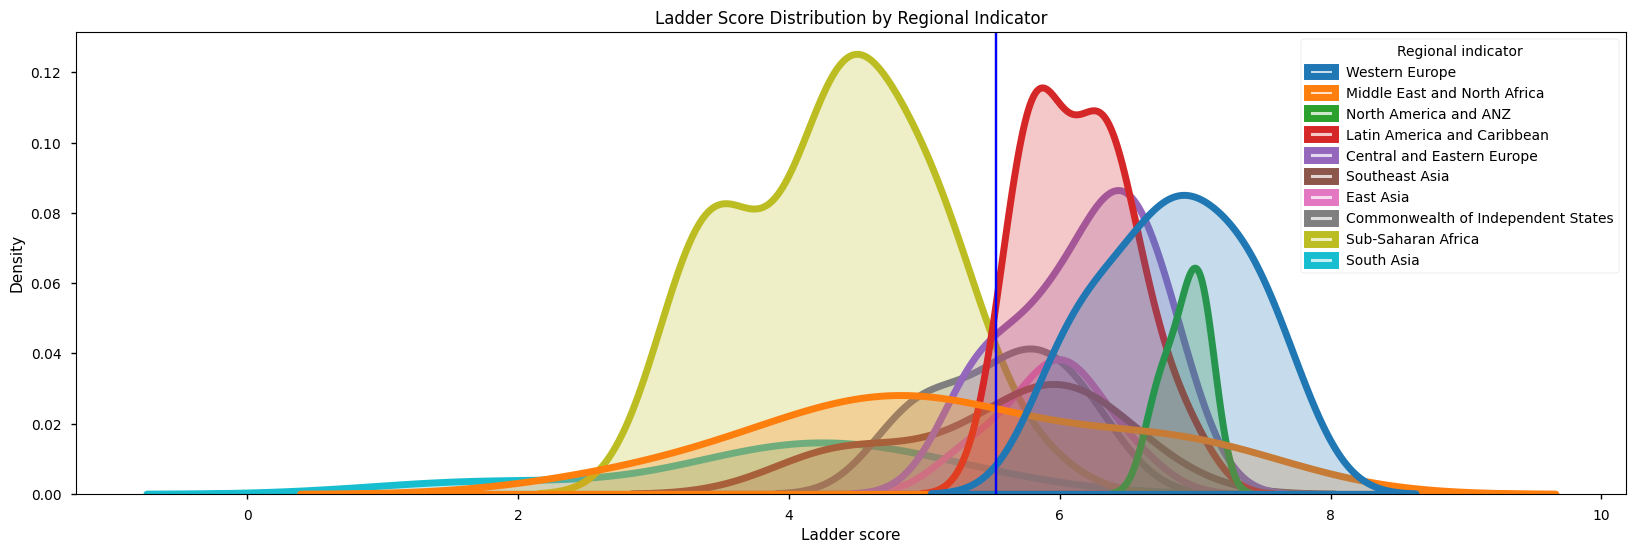

In [86]:
plt.figure(figsize = (20, 6))
sns.kdeplot(data = df2024, x = df2024["Ladder score"], hue = df2024["Regional indicator"], fill = True, linewidth = 5)
plt.title("Ladder Score Distribution by Regional Indicator")
plt.axvline(df2024["Ladder score"].mean(), c = "blue")
plt.show()

<a id = '7'></a>
## Most Generous and Ungenerous Countries in 2024
2024 deki en cömert ve cömert olmayan ülkeleri belli aralıklara göre plot oluşturuyoruz.

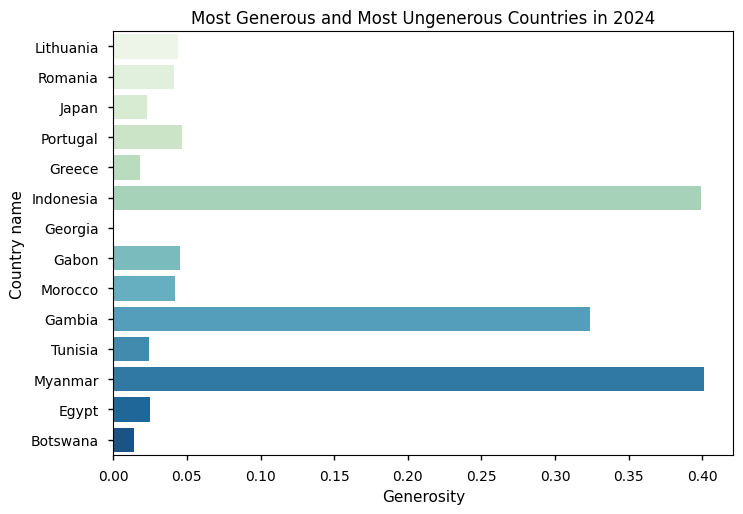

In [87]:
df2024_g = df2024[(df2024.loc[:, "Generosity"] > 0.3) | (df2024.loc[:, "Generosity"] < 0.05)]
sns.barplot(data = df2024_g, x = "Generosity", y = "Country name", palette = "GnBu")
plt.title("Most Generous and Most Ungenerous Countries in 2024")
plt.show()

<a id = '8'></a>
## Generosity Distribution by Regional Indicator In 2024


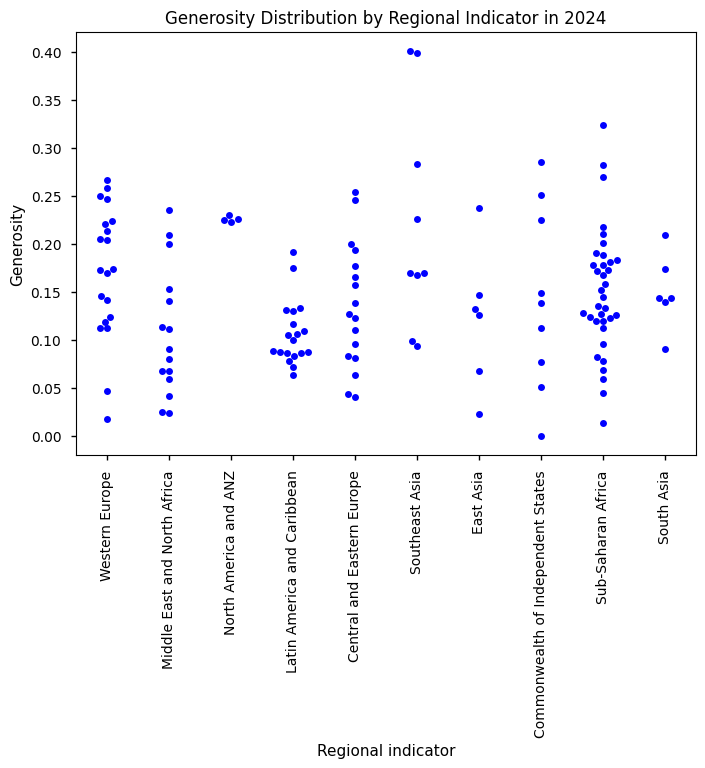

In [88]:
sns.swarmplot(data = df2024, x = "Regional indicator", y = "Generosity", color = "b")
plt.xticks(rotation = 90)
plt.title("Generosity Distribution by Regional Indicator in 2024")
plt.show()

<a id = '9'></a>
## Ladder Score Distribution by Countries in Map View

In [89]:
fig = px.choropleth(df.sort_values("year"),
                   locations = "Country name",
                   color = "Life Ladder",
                   locationmode = "country names",
                   animation_frame = "year")
fig.update_layout(title = "Life Ladder Comparison by Countries")
fig.write_html("interactive_plot7.html")

from IPython.display import IFrame
IFrame("interactive_plot7.html", width = 900, height =900)

<a id = "10"></a>
## Relationship Between Happiness and Income

In [92]:
df2024 = df2024.reset_index(drop=True)

country_continent = {}
for i in range(len(df2024)):
    country_continent[df2024.iloc[i]["Country name"]] = df2024.iloc[i]["Regional indicator"]


print(df["Country name"].value_counts().reset_index().columns)


all_countries = df["Country name"].value_counts().reset_index()["Country name"].tolist()
all_countries_2024 = df2024["Country name"].value_counts().reset_index()["Country name"].tolist()

for x in all_countries:
    if x not in all_countries_2024:
        print(x)

Index(['Country name', 'count'], dtype='object')
Türkiye
Belarus
Tajikistan
Haiti
Rwanda
Syria
Trinidad and Tobago
Central African Republic
Sudan
Burundi
Angola
Somalia
Bhutan
Djibouti
Bahrain
Belize
Suriname
Guyana
Qatar


In [93]:
df = world_happiness.copy()

In [94]:
region = []
for i in range(len(df)):
    if df["Country name"][i] == 'Angola':
        region.append("Sub-Saharan Africa")
    elif df["Country name"][i] == 'Belize':
        region.append("Latin America and Caribbean")
    elif df["Country name"][i] == 'Syria':
        region.append("Middle East and North Africa")
    elif df["Country name"][i] == 'Trinidad and Tobago':
        region.append("Latin America and Caribbean")
    elif df["Country name"][i] == 'Qatar':
        region.append("Middle East and North Africa")
    elif df["Country name"][i] == 'Sudan':
        region.append("Middle East and North Africa")
    elif df["Country name"][i] == 'Central African Republic':
        region.append("Sub-Saharan Africa")
    elif df["Country name"][i] == 'Djibouti':
        region.append("Sub-Saharan Africa")
    elif df["Country name"][i] == 'Guyana':
        region.append("Latin America and Caribbean")
    elif df["Country name"][i] == 'Bhutan':
        region.append("South Asia")
    elif df["Country name"][i] == 'Türkiye':
        region.append("Middle East and North Africa")
    elif df["Country name"][i] == 'Belarus':
        region.append("Central and Eastern Europe")
    elif df["Country name"][i] == 'Tajikistan':
        region.append("South Asia")
    elif df["Country name"][i] == 'Haiti':
        region.append("Latin America and Caribbean")
    elif df["Country name"][i] == 'Rwanda':
        region.append("Sub-Saharan Africa")
    elif df["Country name"][i] == 'Burundi':
        region.append("Sub-Saharan Africa")
    elif df["Country name"][i] == 'Somalia':
        region.append("Sub-Saharan Africa")
    elif df["Country name"][i] == 'Bahrain':
        region.append("Middle East and North Africa")
    elif df["Country name"][i] == 'Suriname':
        region.append("Latin America and Caribbean")
    else:
        region.append(country_continent.get(df["Country name"][i], "Unknown"))

df["region"] = region

In [96]:
df.tail()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,region
2358,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.051,0.831,0.658,0.235,Sub-Saharan Africa
2359,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.003,0.789,0.661,0.346,Sub-Saharan Africa
2360,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.079,0.757,0.610,0.242,Sub-Saharan Africa
2361,Zimbabwe,2022,3.296,7.670,0.666,54.525,0.652,-0.073,0.753,0.641,0.191,Sub-Saharan Africa
2362,Zimbabwe,2023,3.572,7.679,0.694,55.000,0.735,-0.069,0.757,0.610,0.179,Sub-Saharan Africa


In [101]:
df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'region'],
      dtype='object')

In [103]:
fig = px.scatter(df, x = "Log GDP per capita", y = "Life Ladder", animation_frame = "year",
                animation_group = "Country name", template = "plotly_white", color = "region",
                hover_name = "Country name", size_max = 60)
fig.update_layout(title = "Life Ladder and Log GDP per capita Comparison by Countries via Regions for each Year")
fig.write_html("interactive_plot3.html")
IFrame("interactive_plot3.html", width=900, height=600)

yıllar geçmesine rağmen hayat kalitesinin  artması ile yaşam maliyetinin artması değişmiyor. çünkü aralarında 0.78 oranında corelation var.


<a id = '11'></a>
## Relationship Between Happiness and Freedom

In [107]:
fig = px.scatter(df, x = "Freedom to make life choices", y = "Life Ladder", animation_frame = "year",
                animation_group = "Country name", template = "plotly_dark", color = "region",
                hover_name = "Country name", size_max = 60)
fig.update_layout(title = "Life Ladder and Freedom Comparison by countries via Regions for each Year")
fig.write_html("interactive_plot4.html")
IFrame("interactive_plot4.html", width=1500, height=600)

life ladder ile Freedom to make life choices features arasında 0.54 oranında bir corelation var. o yüzden tam yorum yapmak mümkün olmuyor.

<a id = '12'></a>
## Relationship Between Features

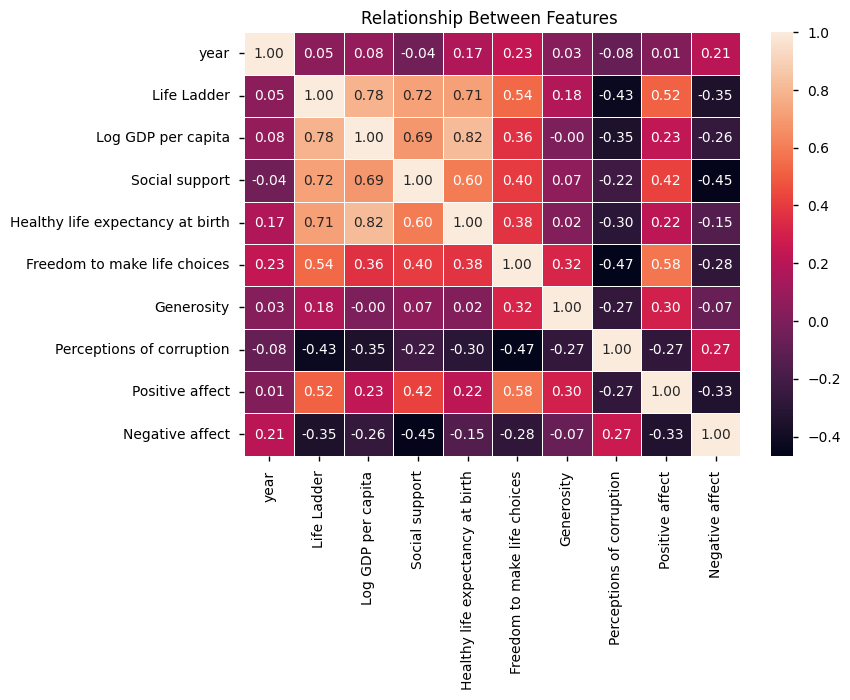

In [108]:
df_num = df.drop(columns = ["Country name", "region"])
sns.heatmap(df_num.corr(), annot = True, fmt = ".2f", linewidth = .7)
plt.title("Relationship Between Features ")
plt.show()

burda heatmap ile tüm featureslar arasındaki corelation ı görüyoruz.

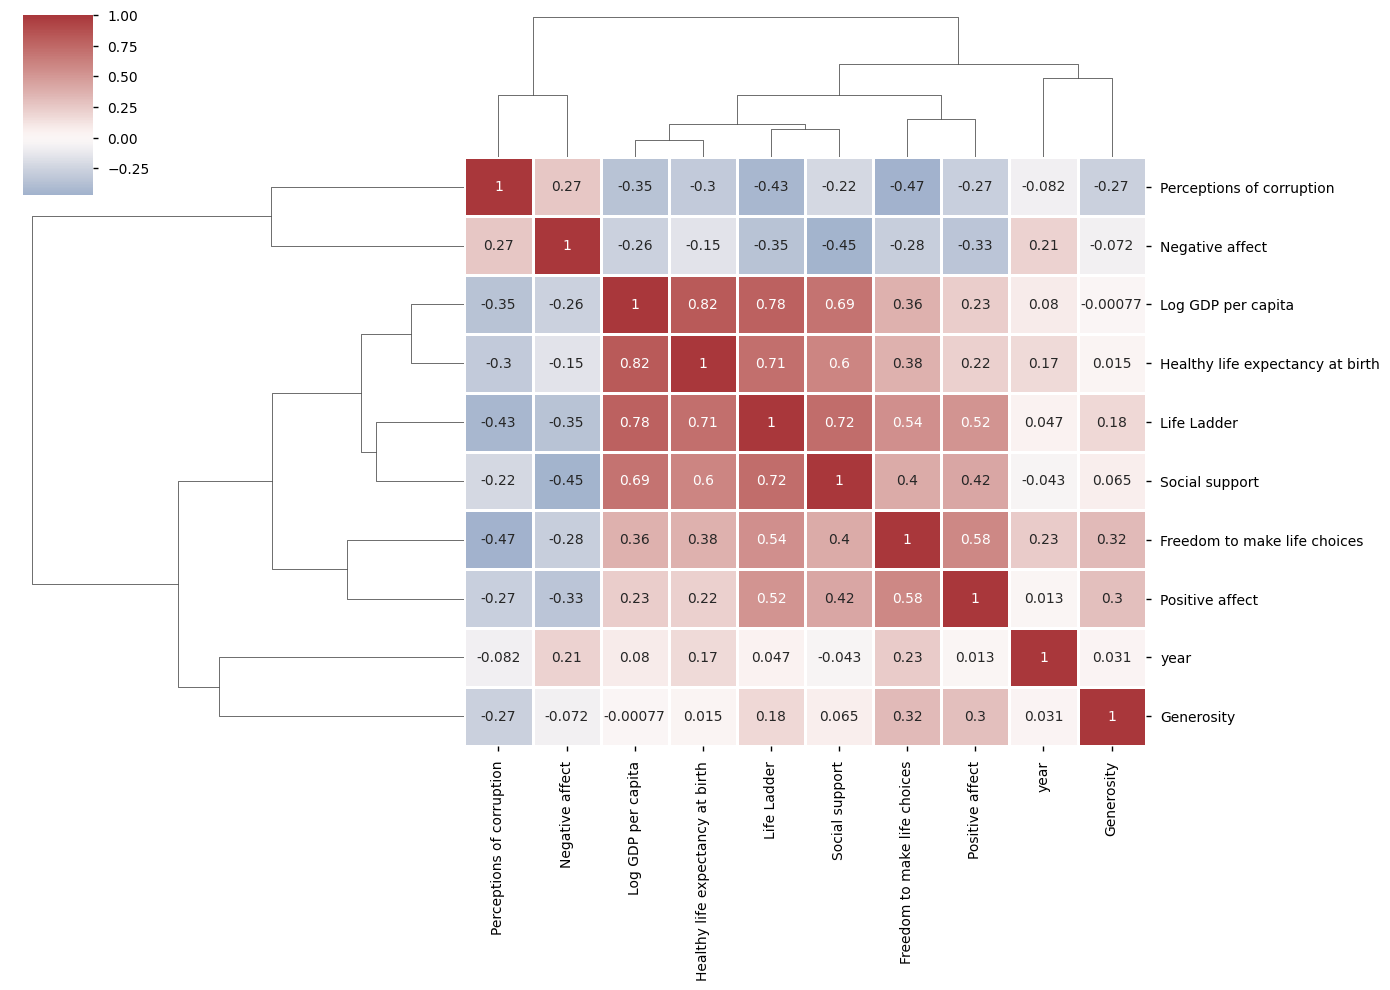

In [113]:
sns.clustermap(df_num.corr(), center = 0, cmap = "vlag", dendrogram_ratio = (0.4, 0.2), annot = True, linewidths = .9, figsize=(14,10))
plt.show()